In [1]:
# !pip3 install --upgrade pip
# !pip3 install tensorflow matplotlib numpy

In [2]:
import tensorflow as tf
import numpy as np
import os, time
import matplotlib.pyplot as plt
from datetime import datetime
from packaging import version
%matplotlib inline
# Load the TensorBoard notebook extension.
%load_ext tensorboard

import publicMethod

Import publicMethod


In [3]:
# tf.keras.optimizers.Optimizer?
# tf.keras.optimizers.SGD?
# tf.keras.optimizers.Adam?
# tf.saved_model.save?
# tf.saved_model.load?

print("TensorFlow version: ", tf.__version__, "\nDevice avaliable now:",tf.config.get_visible_devices())
assert version.parse(tf.__version__).release[0] >= 2, \
"This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.4.1 
Device avaliable now: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [5]:
LOAD_PATH = "./npy/"
SITE_CODE = "722860"
PROJECT_PATH = "tf_model_compare_params"
time = datetime.now().strftime("""%Y%m%d-%H%M%S""")
SAVE_PATH = f"{PROJECT_PATH}/tf_model_params_LR_{SITE_CODE}_{time}"
logdir = f"{SAVE_PATH}/logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
try:
    print(PROJECT_PATH)
    os.mkdir(PROJECT_PATH)
except: pass
try:
    print(SAVE_PATH)
    os.mkdir(SAVE_PATH)
except: pass
try:
    print(SAVE_PATH+"/fig")
    os.mkdir(SAVE_PATH+"/fig")
except: pass

paths = []
for dirname, _, filenames in os.walk(LOAD_PATH):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
print(paths)

tf_model_compare_params
tf_model_compare_params/tf_model_params_LR_722860_20210805-000107
tf_model_compare_params/tf_model_params_LR_722860_20210805-000107/fig
['./npy/avg_b_722860.npy', './npy/.DS_Store', './npy/max_722860.npy', './npy/min_745700.npy', './npy/eemd_min_722860.npy', './npy/avg_722860.npy', './npy/eemd_avg_722860.npy', './npy/min_722860.npy', './npy/max_745700.npy', './npy/eemd_max_722860.npy', './npy/.npy', './npy/imfs_722860.npy', './npy/avg_a_583620.npy', './npy/avg_745700.npy']


In [6]:
def construct_model(train_data, train_label, test_data, test_label):
    #strategy = tf.distribute.MirroredStrategy()
    #with strategy.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(21,)),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(lr = 1e-6),
                  loss='mse')
    # model.summary()
    
    with open(f"{SAVE_PATH}/model_summary.txt", "w") as f:
        f.write("""tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(21,)),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dense(1)
    ])
        model.compile(optimizer=tf.keras.optimizers.SGD(lr = 1e-6),
                  loss='mse')""")

    model.fit(train_data, train_label, epochs=200, callbacks=[tensorboard_callback], validation_data=(test_data, test_label), verbose=0)

    model.evaluate(test_data, test_label)
    
    return model

In [7]:
def retrain(model, train_data, train_label, test_data, test_label):
    model.fit(train_data, train_label, epochs=25, callbacks=[tensorboard_callback], validation_data=(test_data, test_label), verbose = 0)
    return model

In [8]:
def plot(model_predict, test_label, predict_train, train_label, i, name):
    global SITE_CODE, PROJECT_PATH
    fig, axes = plt.subplots(4, 1)
    error = model_predict.T[0] - test_label
    axes[0].plot((-error))
    axes[1].plot(test_label, "r")
    axes[1].plot(model_predict, "g")
    
    error = predict_train.T[0] - train_label
    axes[2].plot((-error))
    axes[3].plot(train_label, "r")
    axes[3].plot(predict_train, "g")
    plt.xlabel(f"data {name} imf {i} from %s"%SITE_CODE)
    plt.ylabel("Temperature/F")
    plt.gcf().set_size_inches(14, 20)
    plt.savefig(f"./{SAVE_PATH}/fig/Error_{name}_imf{i}_%s.jpg"%SITE_CODE)
    plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6

707/707 [==============================] - 1s 2ms/step - loss: 2.2693 - val_loss: 1.8702
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 2.3435 - val_loss: 1.8695
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 2.2900 - val_loss: 1.8692
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 2.2789 - val_loss: 1.8686
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 2.3144 - val_loss: 1.8680
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 2.2589 - val_loss: 1.8677
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 2.2906 - val_loss: 1.8670
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 2.2776 - val_loss: 1.8668
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 2.2317 - val_loss: 1.8663
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 2.2911 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0838 - val_loss: 1.8502
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 2.1313 - val_loss: 1.8502
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 2.1417 - val_loss: 1.8501
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 2.1159 - val_loss: 1.8500
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 2.1152 - val_loss: 1.8498
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 2.1341 - val_loss: 1.8497
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 2.1318 - val_loss: 1.8497
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0975 - val_loss: 1.8497
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 2.1295 - val_loss: 1.8495
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

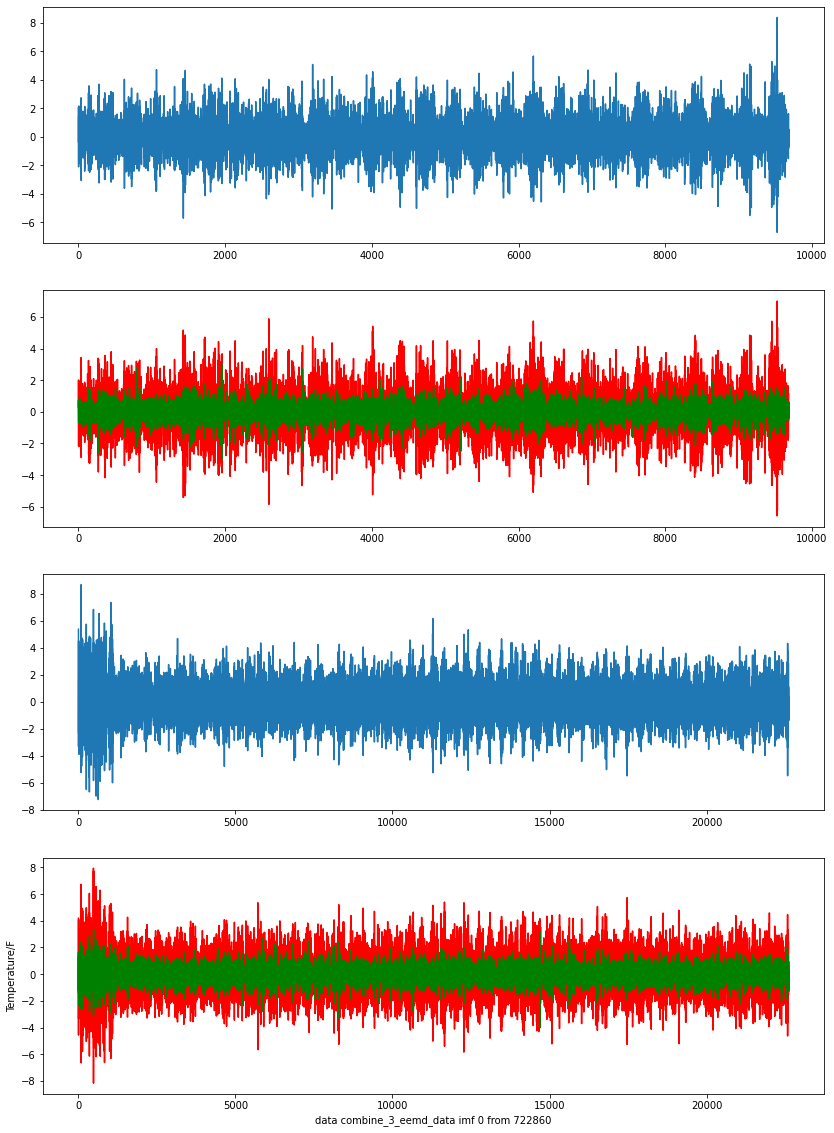

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.0739 - val_loss: 0.0654
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0728 - val_loss: 0.0653
Epoch 70/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0750 - val_loss: 0.0651
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0744 - val_loss: 0.0650
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0722 - val_loss: 0.0649
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0752 - val_loss: 0.0648
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0747 - val_loss: 0.0646
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0736 - val_loss: 0.0645
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0740 - val_loss: 0.0644
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0725 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0683 - val_loss: 0.0577
Epoch 149/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0688 - val_loss: 0.0576
Epoch 150/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0682 - val_loss: 0.0576
Epoch 151/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0684 - val_loss: 0.0575
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0671 - val_loss: 0.0574
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0656 - val_loss: 0.0573
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0664 - val_loss: 0.0573
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0675 - val_loss: 0.0572
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0666 - val_loss: 0.0571
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

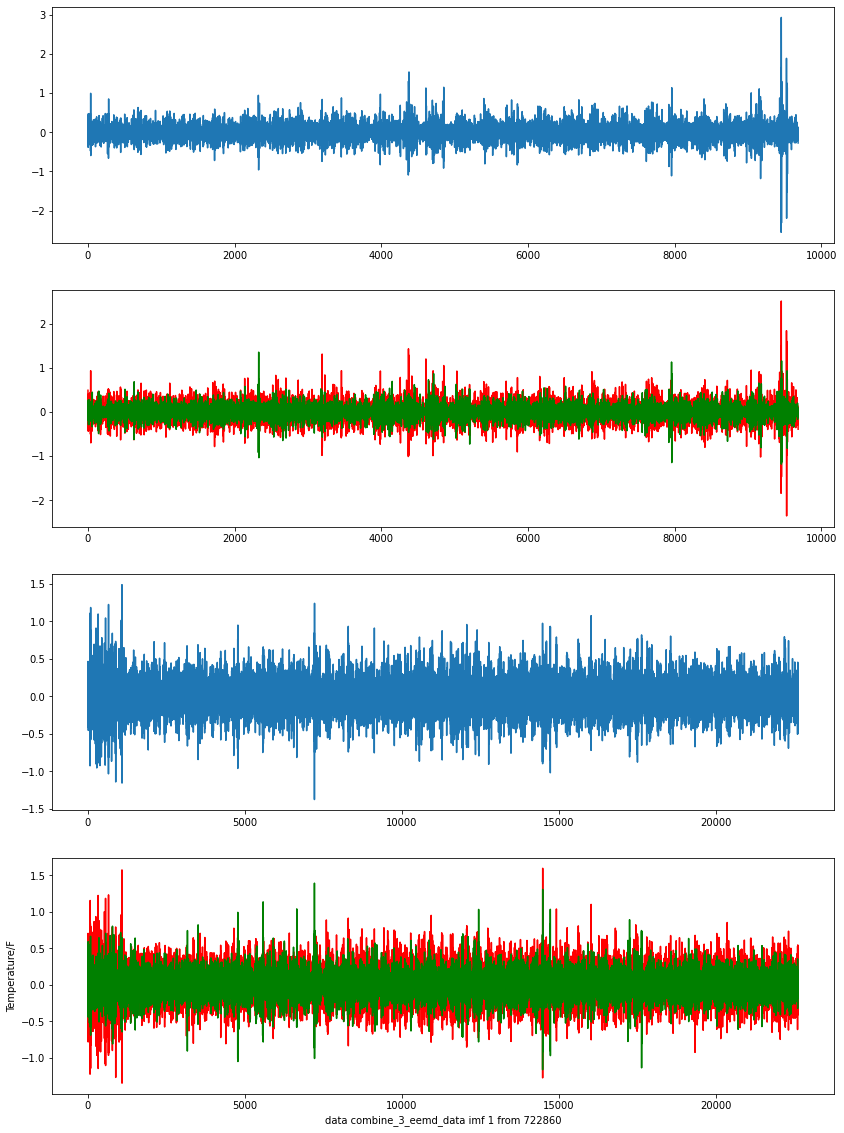

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.7814 - val_loss: 0.3997
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7902 - val_loss: 0.3988
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7618 - val_loss: 0.3979
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7663 - val_loss: 0.3970
Epoch 72/200
707/707 [==============================] - 2s 2ms/step - loss: 0.7699 - val_loss: 0.3962
Epoch 73/200
707/707 [==============================] - 2s 2ms/step - loss: 0.7581 - val_loss: 0.3955
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7665 - val_loss: 0.3945
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7566 - val_loss: 0.3937
Epoch 76/200
707/707 [==============================] - 2s 2ms/step - loss: 0.7654 - val_loss: 0.3930
Epoch 77/200
707/707 [==============================] - 2s 2ms/step - loss: 0.7632 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6231 - val_loss: 0.3586
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6183 - val_loss: 0.3583
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6157 - val_loss: 0.3579
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6291 - val_loss: 0.3577
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6238 - val_loss: 0.3574
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6158 - val_loss: 0.3570
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6054 - val_loss: 0.3567
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6112 - val_loss: 0.3564
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6158 - val_loss: 0.3561
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

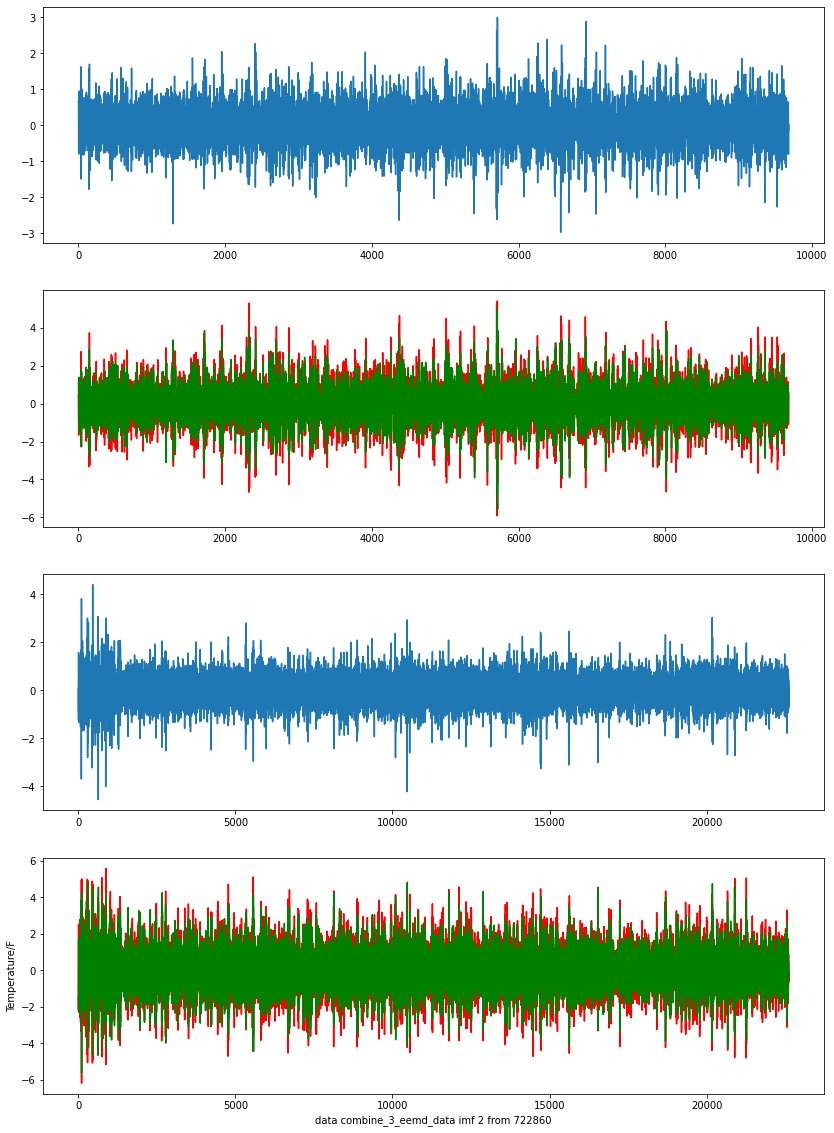

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.8636 - val_loss: 0.5354 - loss: 0
Epoch 68/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8503 - val_loss: 0.5320
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8505 - val_loss: 0.5282
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8608 - val_loss: 0.5253
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8542 - val_loss: 0.5226
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8571 - val_loss: 0.5200
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8139 - val_loss: 0.5174
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8144 - val_loss: 0.5146
Epoch 75/200
707/707 [==============================] - 2s 2ms/step - loss: 0.8353 - val_loss: 0.5122
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8216 - 

Epoch 147/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6400 - val_loss: 0.4255
Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6327 - val_loss: 0.4248
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6468 - val_loss: 0.4240
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6389 - val_loss: 0.4237
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6365 - val_loss: 0.4235
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6391 - val_loss: 0.4228
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6321 - val_loss: 0.4227
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6216 - val_loss: 0.4219
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6365 - val_loss: 0.4215
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - lo

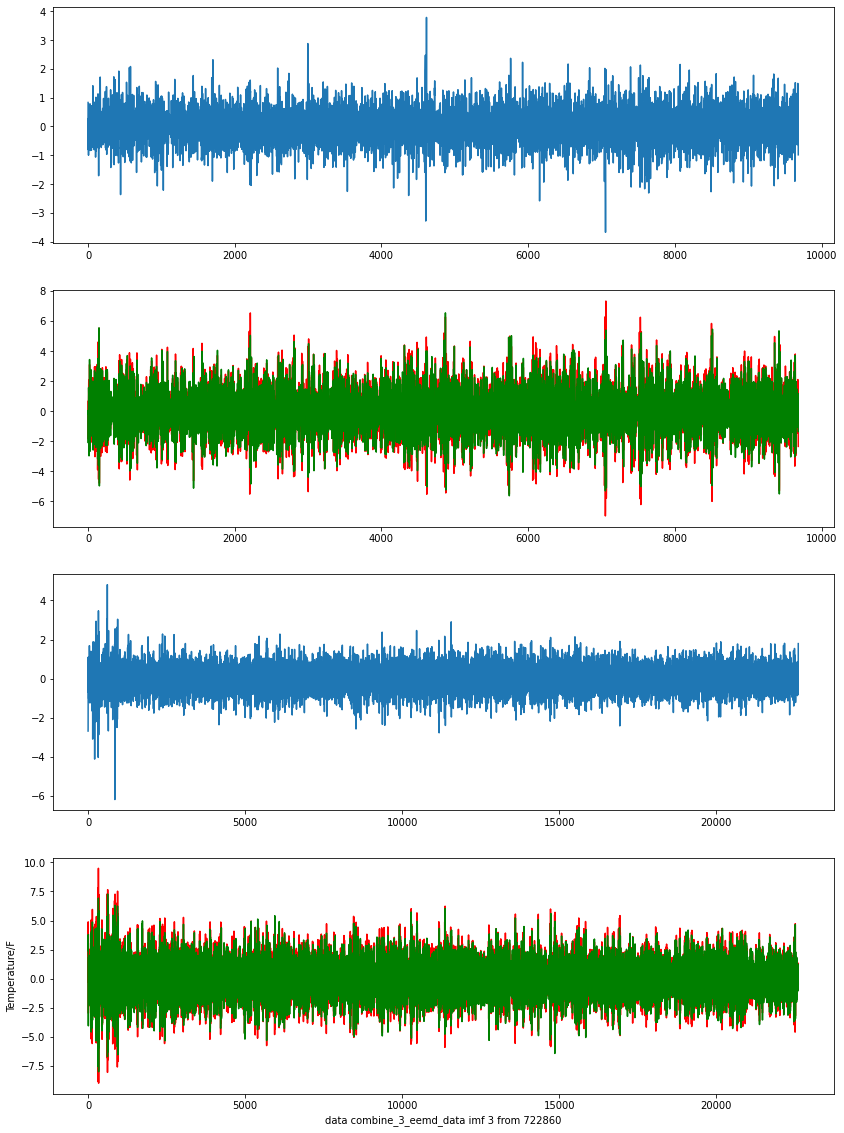

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.6706 - val_loss: 0.2317
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6625 - val_loss: 0.2306
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6478 - val_loss: 0.2292
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6354 - val_loss: 0.2278
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6532 - val_loss: 0.2272
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6243 - val_loss: 0.2261
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6440 - val_loss: 0.2256
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6291 - val_loss: 0.2244
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6224 - val_loss: 0.2228
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6175 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4302 - val_loss: 0.1906
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4268 - val_loss: 0.1906
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4230 - val_loss: 0.1905
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4429 - val_loss: 0.1904
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4284 - val_loss: 0.1902
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4250 - val_loss: 0.1899
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4283 - val_loss: 0.1899
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4268 - val_loss: 0.1894
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4226 - val_loss: 0.1891
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

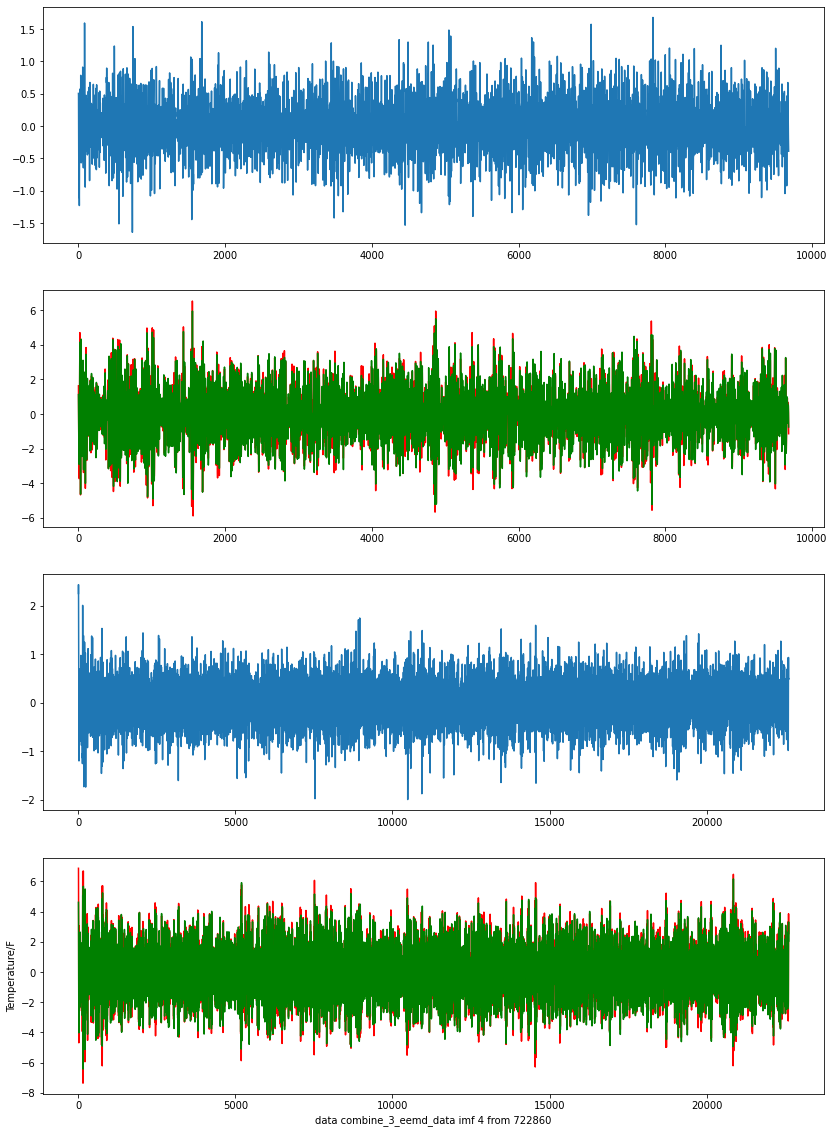

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.4453 - val_loss: 0.1574
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4274 - val_loss: 0.1564
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4266 - val_loss: 0.1554
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4331 - val_loss: 0.1545
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4150 - val_loss: 0.1535
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4187 - val_loss: 0.1525
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4144 - val_loss: 0.1515
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4165 - val_loss: 0.1506
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4196 - val_loss: 0.1496
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4096 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2668 - val_loss: 0.1039
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2678 - val_loss: 0.1035
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2764 - val_loss: 0.1030
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2751 - val_loss: 0.1026
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2702 - val_loss: 0.1021
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2629 - val_loss: 0.1017
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2646 - val_loss: 0.1012
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2713 - val_loss: 0.1008
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2632 - val_loss: 0.1004
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

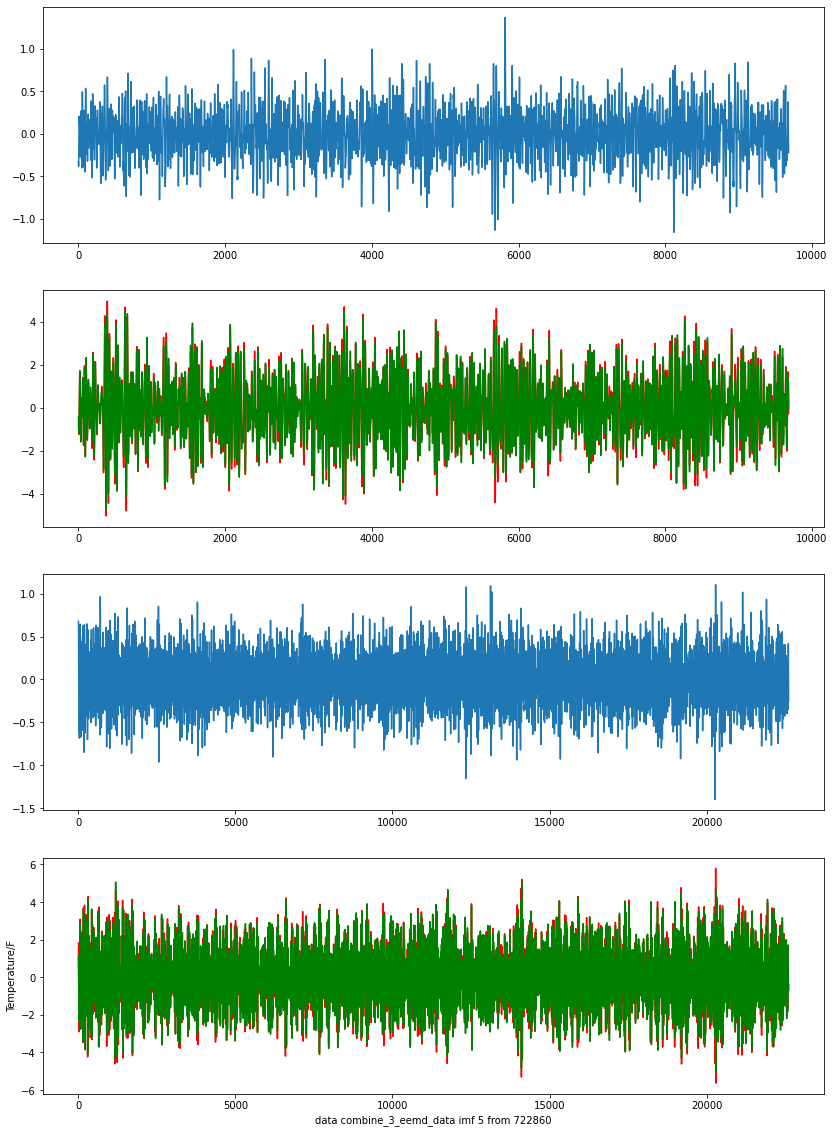

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.2589 - val_loss: 0.0360
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2643 - val_loss: 0.0356
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2576 - val_loss: 0.0357
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2469 - val_loss: 0.0356
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2392 - val_loss: 0.0354
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2501 - val_loss: 0.0350
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2452 - val_loss: 0.0354
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2439 - val_loss: 0.0351
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2483 - val_loss: 0.0349
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2436 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1583 - val_loss: 0.0269
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1639 - val_loss: 0.0269
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1632 - val_loss: 0.0268
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1640 - val_loss: 0.0266
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1573 - val_loss: 0.0267
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1540 - val_loss: 0.0265
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1566 - val_loss: 0.0266
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1565 - val_loss: 0.0264
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1615 - val_loss: 0.0262
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

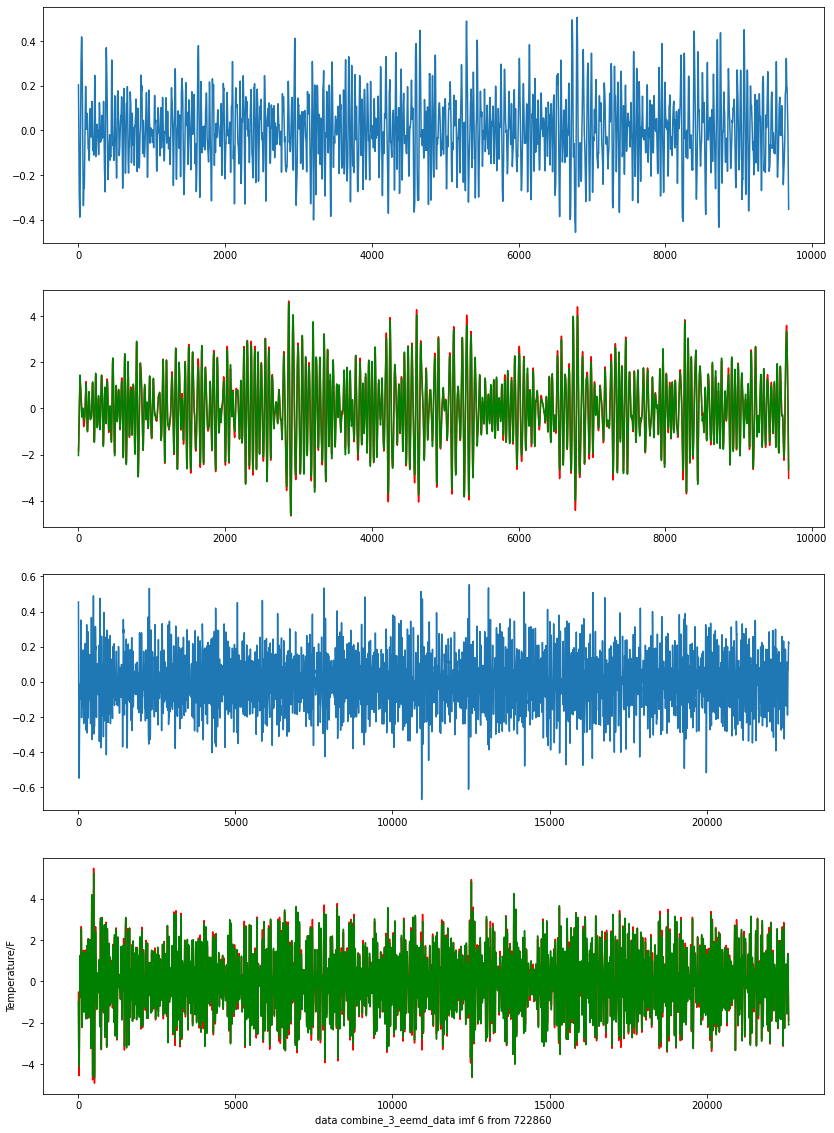

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.3147 - val_loss: 0.0529
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3106 - val_loss: 0.0520
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3231 - val_loss: 0.0513
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3068 - val_loss: 0.0507
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3042 - val_loss: 0.0501
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2905 - val_loss: 0.0491
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3005 - val_loss: 0.0484
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2963 - val_loss: 0.0478
Epoch 76/200
707/707 [==============================] - 2s 2ms/step - loss: 0.2892 - val_loss: 0.0471
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2949 - val_loss: 

707/707 [==============================] - 1s 2ms/step - loss: 0.1690 - val_loss: 0.0263
Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1666 - val_loss: 0.0262
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1745 - val_loss: 0.0261
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1711 - val_loss: 0.0260
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1704 - val_loss: 0.0259
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1674 - val_loss: 0.0258
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1598 - val_loss: 0.0257
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1655 - val_loss: 0.0256
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1615 - val_loss: 0.0255
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1635 - v

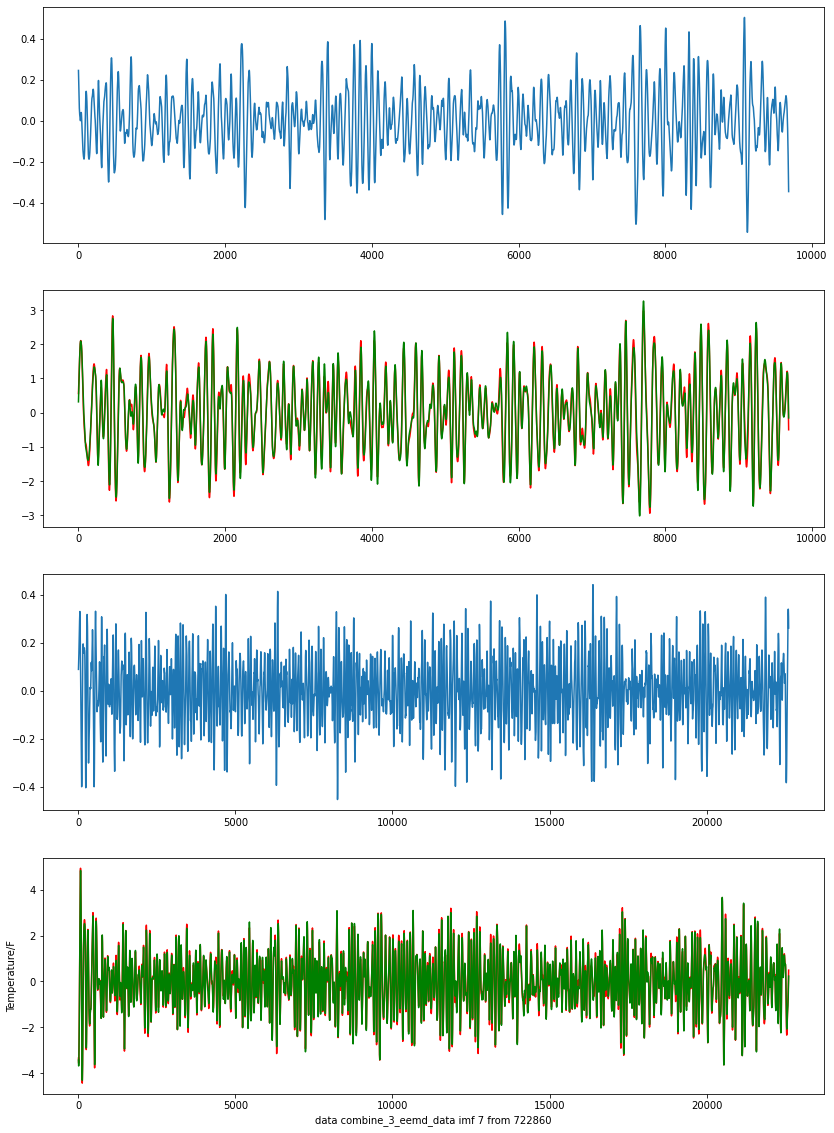

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.3523 - val_loss: 0.0489
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3618 - val_loss: 0.0473
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3562 - val_loss: 0.0481
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3638 - val_loss: 0.0449
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3518 - val_loss: 0.0447
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3496 - val_loss: 0.0432
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3405 - val_loss: 0.0413
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3309 - val_loss: 0.0403
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3340 - val_loss: 0.0381
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3307 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2142 - val_loss: 0.0147
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2092 - val_loss: 0.0145
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2208 - val_loss: 0.0142
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2173 - val_loss: 0.0146
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2113 - val_loss: 0.0141
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2053 - val_loss: 0.0144
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2161 - val_loss: 0.0147
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2041 - val_loss: 0.0143
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2124 - val_loss: 0.0141
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

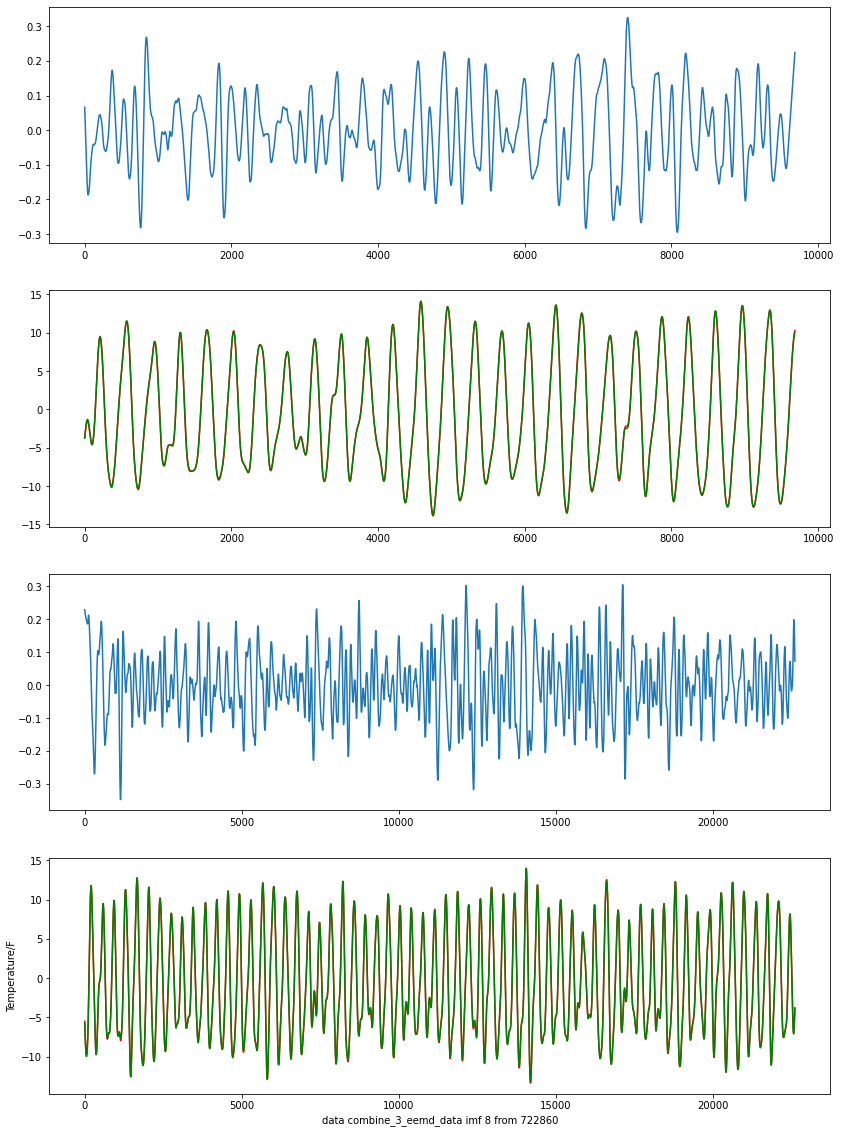

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.3805 - val_loss: 0.0384
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3735 - val_loss: 0.0378
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3795 - val_loss: 0.0376
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3545 - val_loss: 0.0370
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3659 - val_loss: 0.0366
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3659 - val_loss: 0.0362
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3672 - val_loss: 0.0359
Epoch 75/200
707/707 [==============================] - 2s 2ms/step - loss: 0.3515 - val_loss: 0.0352
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3352 - val_loss: 0.0348
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3490 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1626 - val_loss: 0.0158
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1781 - val_loss: 0.0155
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1737 - val_loss: 0.0154
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1717 - val_loss: 0.0152
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1750 - val_loss: 0.0152
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1720 - val_loss: 0.0149
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1627 - val_loss: 0.0153
Epoch 155/200
707/707 [==============================] - 2s 2ms/step - loss: 0.1705 - val_loss: 0.0146
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1687 - val_loss: 0.0145
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

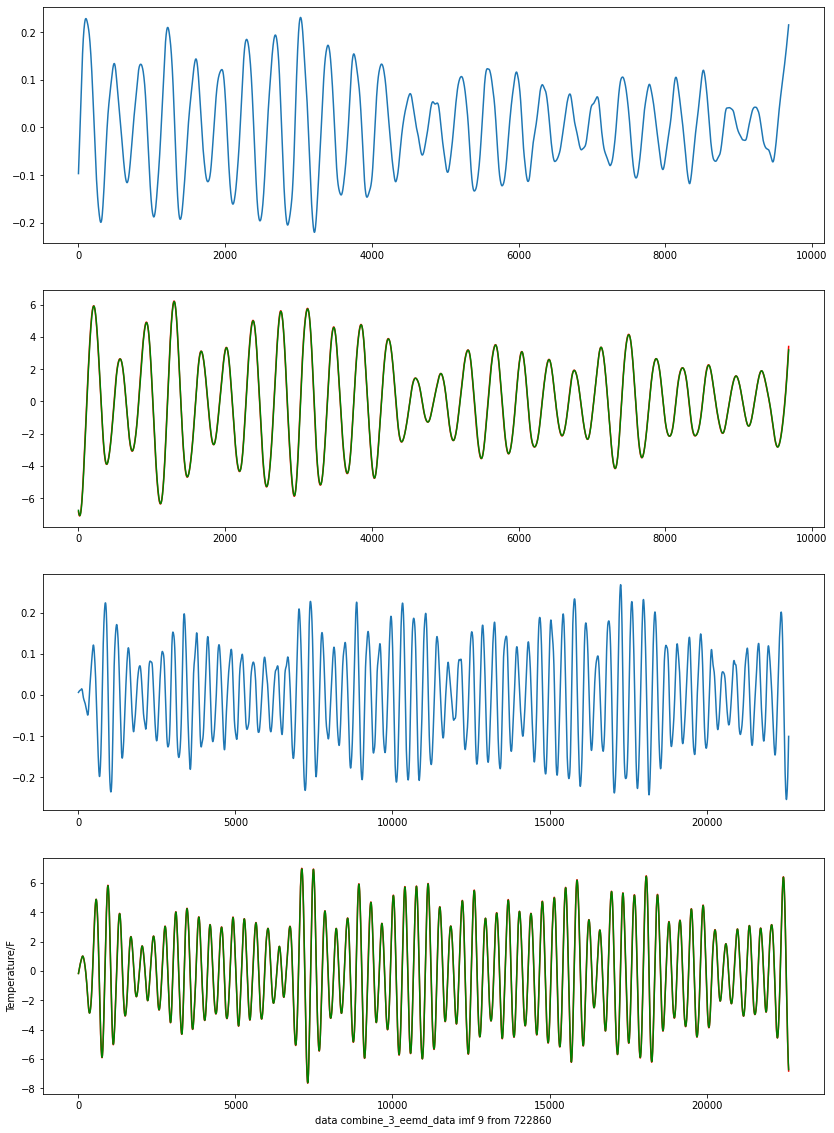

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.1226 - val_loss: 6.3987e-04
Epoch 68/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1137 - val_loss: 6.4872e-04
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1139 - val_loss: 6.6669e-04
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1159 - val_loss: 6.7357e-04
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1130 - val_loss: 6.6215e-04
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1172 - val_loss: 6.4739e-04
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1144 - val_loss: 6.3640e-04
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1208 - val_loss: 6.2895e-04
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1221 - val_loss: 6.2319e-04
Epoch 76/200
707/707 [==============================] - 1s 

Epoch 144/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0981 - val_loss: 6.3727e-04
Epoch 145/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0894 - val_loss: 6.2548e-04
Epoch 146/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0907 - val_loss: 6.3367e-04
Epoch 147/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0888 - val_loss: 6.4618e-04
Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0931 - val_loss: 6.5556e-04
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0917 - val_loss: 6.5259e-04
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0932 - val_loss: 6.7829e-04
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0928 - val_loss: 6.5901e-04
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0960 - val_loss: 6.3731e-04
Epoch 153/200
707/707 [==============

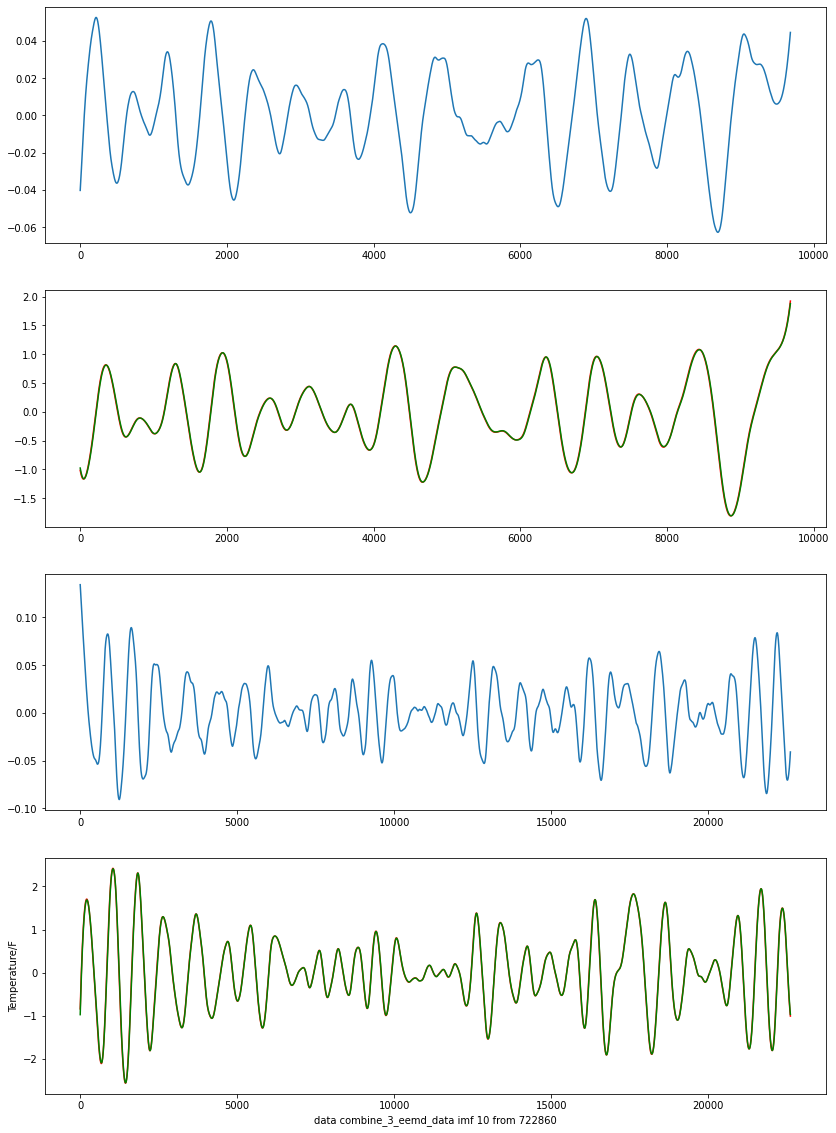

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.0692 - val_loss: 2.8820e-04
Epoch 68/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0720 - val_loss: 2.7696e-04
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0695 - val_loss: 2.5472e-04
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0728 - val_loss: 2.4591e-04
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0685 - val_loss: 2.3360e-04
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0747 - val_loss: 2.2951e-04
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0684 - val_loss: 2.2106e-04
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0738 - val_loss: 2.1909e-04
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0683 - val_loss: 2.0744e-04
Epoch 76/200
707/707 [==============================] - 1s 

Epoch 144/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0613 - val_loss: 8.3906e-05
Epoch 145/200
707/707 [==============================] - 2s 3ms/step - loss: 0.0625 - val_loss: 8.3226e-05
Epoch 146/200
707/707 [==============================] - 2s 3ms/step - loss: 0.0590 - val_loss: 8.3134e-05
Epoch 147/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0645 - val_loss: 8.3361e-05
Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0610 - val_loss: 8.2766e-05
Epoch 149/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0595 - val_loss: 8.3156e-05
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0620 - val_loss: 8.2283e-05
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0611 - val_loss: 8.2047e-05
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0639 - val_loss: 8.1920e-05
Epoch 153/200
707/707 [==============

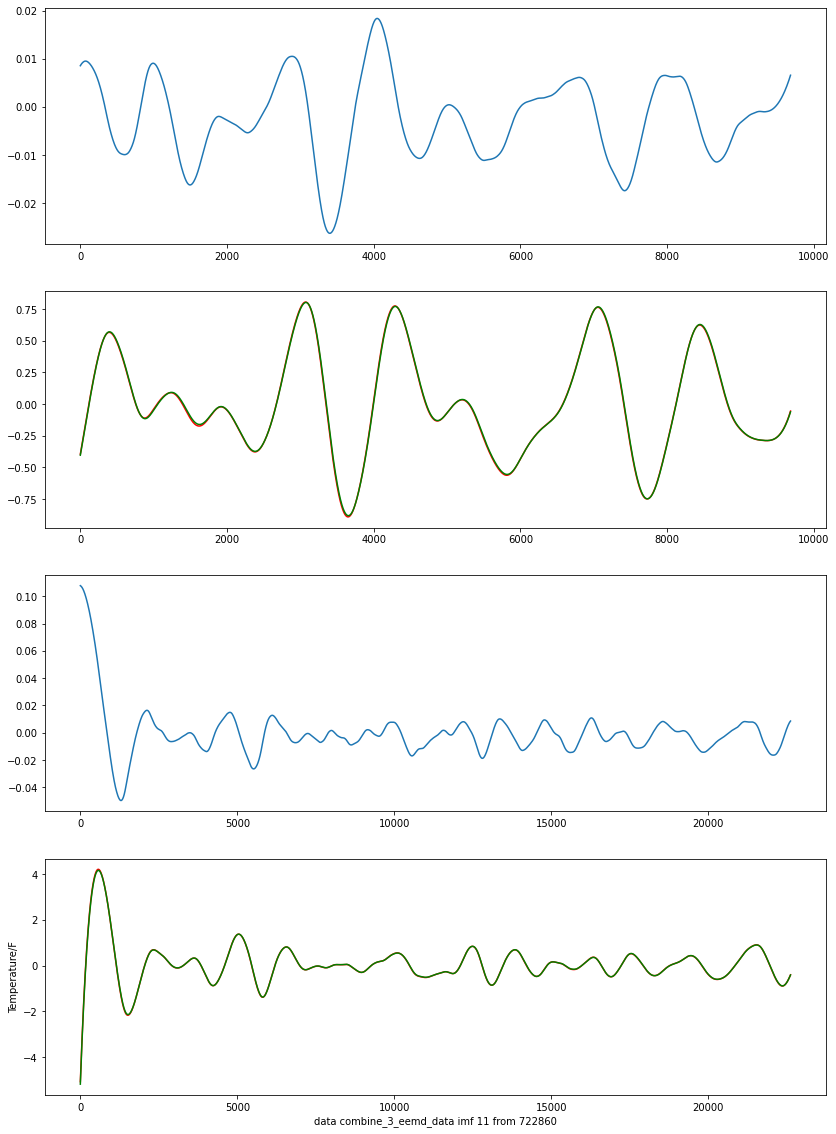

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 2s 2ms/step - loss: 0.0606 - val_loss: 0.0160
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0598 - val_loss: 0.0156
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0600 - val_loss: 0.0151
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0591 - val_loss: 0.0146
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0581 - val_loss: 0.0142
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0602 - val_loss: 0.0138
Epoch 74/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0587 - val_loss: 0.0133
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0575 - val_loss: 0.0129
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0555 - val_loss: 0.0125
Epoch 77/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0571 - val_loss: 

707/707 [==============================] - 1s 2ms/step - loss: 0.0406 - val_loss: 0.0015
Epoch 148/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0409 - val_loss: 0.0015
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0402 - val_loss: 0.0014
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0418 - val_loss: 0.0014
Epoch 151/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0421 - val_loss: 0.0013
Epoch 152/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0408 - val_loss: 0.0013
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0420 - val_loss: 0.0013
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0409 - val_loss: 0.0012
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0391 - val_loss: 0.0012
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0402 - v

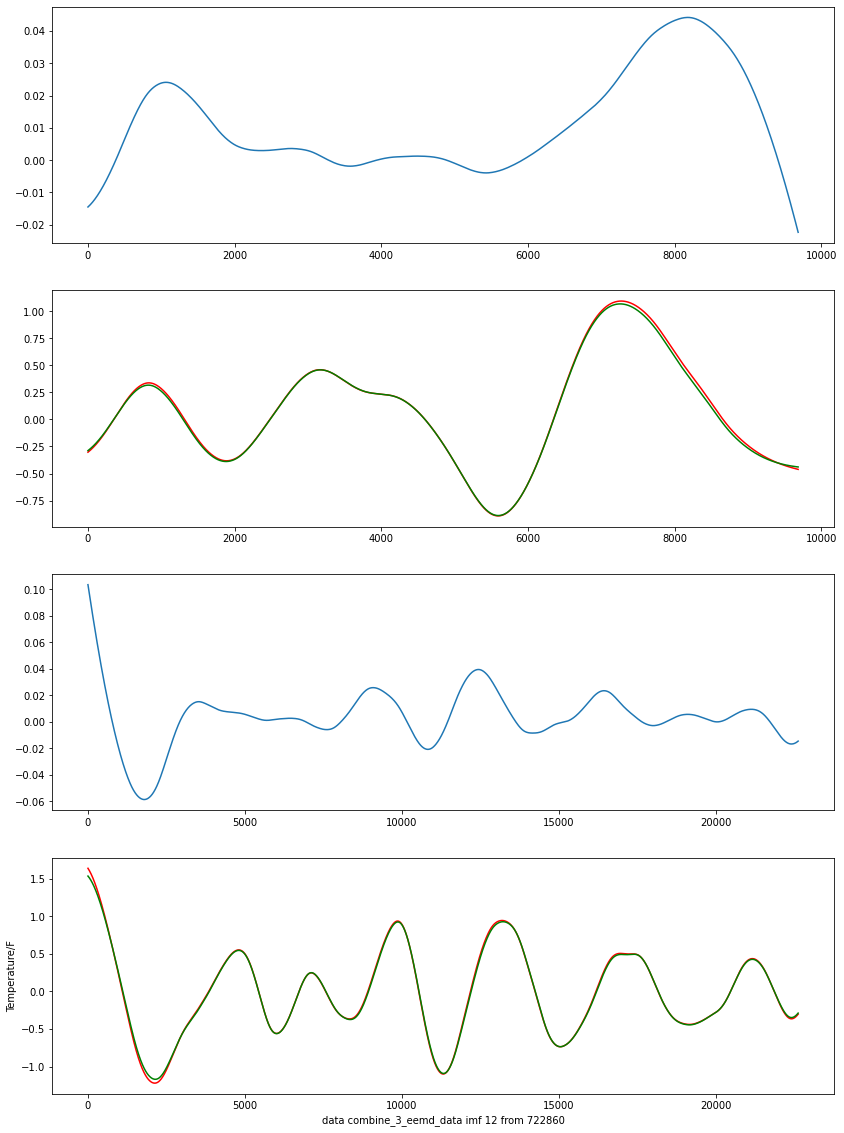

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 7.9490 - val_loss: 0.2362
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 7.9097 - val_loss: 0.0181
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 7.7491 - val_loss: 0.0114
Epoch 71/200
707/707 [==============================] - 2s 2ms/step - loss: 7.9879 - val_loss: 0.3688
Epoch 72/200
707/707 [==============================] - 2s 2ms/step - loss: 7.9715 - val_loss: 0.0034
Epoch 73/200
707/707 [==============================] - 2s 3ms/step - loss: 7.7160 - val_loss: 0.3623
Epoch 74/200
707/707 [==============================] - 2s 3ms/step - loss: 7.8362 - val_loss: 0.0632
Epoch 75/200
707/707 [==============================] - 2s 3ms/step - loss: 7.9171 - val_loss: 0.0167s - lo
Epoch 76/200
707/707 [==============================] - 2s 2ms/step - loss: 7.8003 - val_loss: 0.1204
Epoch 77/200
707/707 [==============================] - 2s 2ms/step - loss: 7.7572 - val_

707/707 [==============================] - 1s 2ms/step - loss: 7.4844 - val_loss: 0.0291
Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 7.8253 - val_loss: 0.5723
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 7.8147 - val_loss: 0.0181
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 7.6762 - val_loss: 0.0128
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 7.8765 - val_loss: 0.2994
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 7.9219 - val_loss: 0.0155
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 7.8621 - val_loss: 0.0373
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 7.8900 - val_loss: 0.0402
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 7.9389 - val_loss: 0.0992
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 7.8642 - v

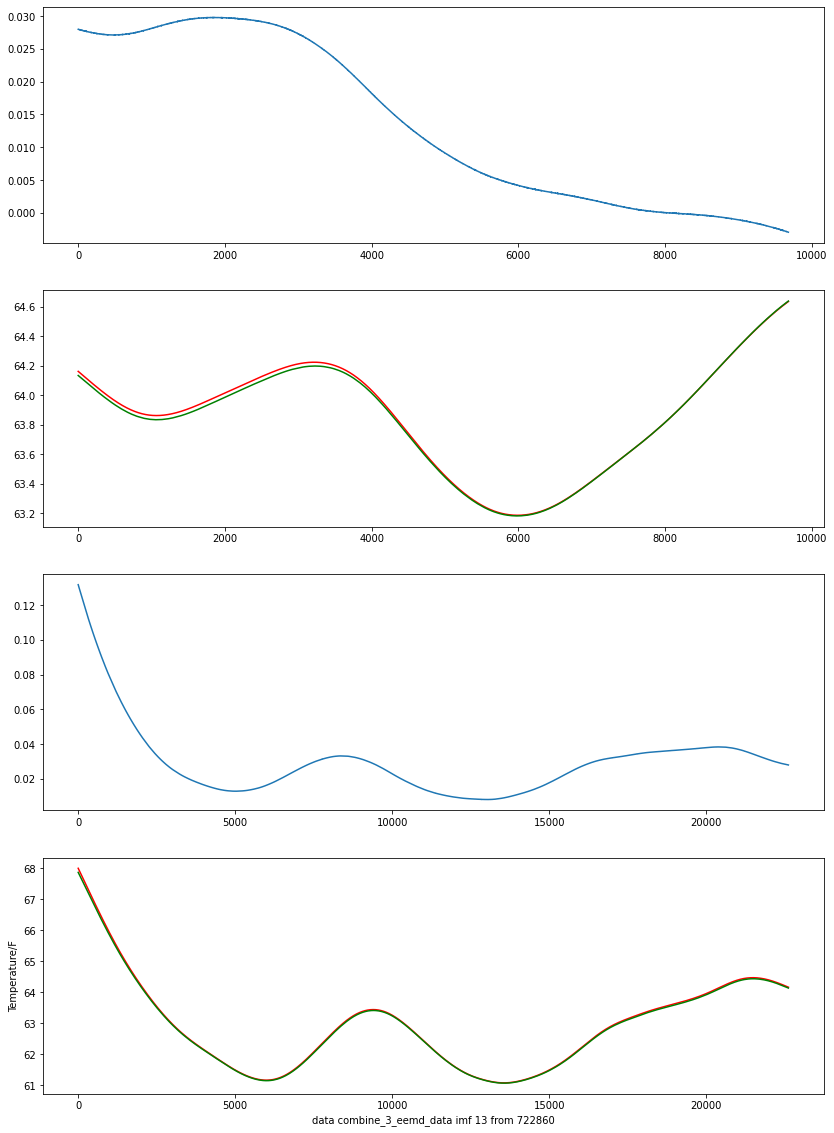

-------------------------------------------------------------------


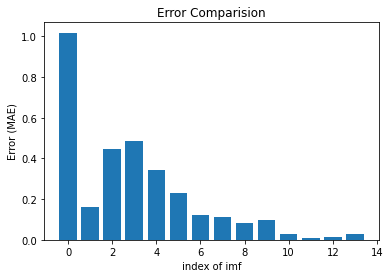

In [9]:
name = "combine_3_eemd_data"
error = []
train_set_avg = np.load(f"./npy/eemd_avg_%s.npy"%SITE_CODE)
train_set_min = np.load(f"./npy/eemd_min_%s.npy"%SITE_CODE)
train_set_max = np.load(f"./npy/eemd_max_%s.npy"%SITE_CODE)

verify = train_set_max[0] == train_set_avg[0]
assert not verify[np.argmin(verify)], data_have_same

tf.keras.backend.clear_session()

for i in range(len(train_set_avg)):
    train_sub_avg = train_set_avg[i]
    train_sub_min = train_set_min[i]
    train_sub_max = train_set_max[i]
    
    train_index = int(len(train_set_avg[0])*.7+5/9)
    
    (train_data_avg, train_label), (test_data_avg, test_label) = publicMethod.generate(train_index, train_sub_avg)
    (train_data_min, _), (test_data_min, _) = publicMethod.generate(train_index, train_sub_min)
    (train_data_max, _), (test_data_max, _) = publicMethod.generate(train_index, train_sub_max)

    train_data = np.concatenate([train_data_avg, train_data_min, train_data_max], axis = 1)
    test_data = np.concatenate([test_data_avg, test_data_min, test_data_max], axis = 1)
    
    # print(train_data_avg[0] == train_data_min[0], train_set[0])
    
    model = construct_model(train_data, train_label, test_data, test_label)
    
    mse_test = np.sum((model.predict(test_data) - test_label.reshape(-1, 1))**2)/len(test_label)
    mse_train = np.sum((model.predict(train_data) - train_label.reshape(-1, 1))**2)/len(train_label)
    
    fail_safe, index = True, 0
    base_line = np.sum((train_sub_avg[1:] - train_sub_avg[:-1])**2)/(len(train_sub_avg)-1)
    
    """while mse_test >= base_line/(len(train_set_avg)-i+1) and fail_safe:
        print("-------------------------------------------------------------------")
        index += 1
        print(f"\bEpoch:{index}\nMSE\nTRAIN:{mse_train}\tTEST:{mse_test}\nBase_line:{base_line}\tDIFFERENT:{abs(base_line - mse_test)}\nTARGET:{base_line/(len(train_set_avg)-i+1)}\033[0m")
        model = retrain(model, train_data, train_label, test_data, test_label)
        mse_test = np.sum((model.predict(test_data) - test_label.reshape(-1, 1))**2)/len(test_label)
        mse_train = np.sum((model.predict(train_data) - train_label.reshape(-1, 1))**2)/len(train_label)
            
        if index == 10:
            fail_safe = False"""
    
    
    print(f"\bEpoch:{i}\nMSE\nTRAIN:{mse_train}\tTEST:{mse_test}\nBase_line:{base_line}\tDIFFERENT:{abs(base_line - mse_test)}\nTARGET:{base_line/(len(train_set_avg)-i+1)}\033[0m")
    plot(model.predict(test_data), test_label, model.predict(train_data), train_label, i, name)
    error.append(np.sum(abs(model.predict(train_data) - train_label.reshape(-1, 1)))/len(train_label))
        
    #tf.saved_model.save(model, f'{SAVE_PATH}/{SITE_CODE}_{name}_imf{i}.params')
    model.save_weights(f'{SAVE_PATH}/{SITE_CODE}_{name}_imf{i}.params')
    print("-------------------------------------------------------------------")
    tf.keras.backend.clear_session()

plt.bar(range(len(error)), error)
plt.xlabel("index of imf")
plt.ylabel("Error (MAE)")
plt.title("Error Comparision")
plt.savefig(f"{SAVE_PATH}/fig/MAE_Error_Compare_{name}_%s.jpg"%SITE_CODE)
plt.show()

In [10]:
# %tensorboard --logdir logs/scalars